In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier



#visualisation de graphe
from IPython.display import Image
import pydotplus, graphviz
from sklearn.tree import export_graphviz
from six import StringIO

import os
os.environ["PATH"] += os.pathsep + r"C:\Users\horai\Documents\projets\md4_math\data_env\Graphviz-10.0.1-win64\bin"

# Removing empty data

In [ ]:
us_dataset_df = pandas.read_excel("US_population_dataset.xlsx")

In [ ]:
us_dataset_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [ ]:
us_dataset_df.apply(lambda x : x == "?", axis=0).sum()

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
for column_name in us_dataset_df.columns:
    us_dataset_df = us_dataset_df[us_dataset_df[column_name] != "?"]

In [ ]:
us_dataset_df.apply(lambda x : x == "?", axis=0).sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
us_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education.num   30162 non-null  int64 
 4   marital.status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   sex             30162 non-null  object
 8   capital.gain    30162 non-null  int64 
 9   capital.loss    30162 non-null  int64 
 10  hours.per.week  30162 non-null  int64 
 11  native.country  30162 non-null  object
 12  income          30162 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


# Convert categorical values into integer values
Pour nous aider dans la préparation des données on va utiliser un module appelé **preprocessing** issu de **scikit-learn**
Mais d'abord il faut récupérer le sous data-frame qui contiens les valeurs de type objet (string)
Sur ce data frame on utilise la méthode **apply** pour faire tourner l'encodeur sur chaque ligne, plus particulièrement **fit_transform**, pour transformer les données dans nos colonnes en integers de 0 à n, n étant le nombre de valeurs uniques dans la colonne.

In [ ]:
us_dataset_object_sub_df = us_dataset_df.select_dtypes(include=['object'])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
us_dataset_object_sub_df = us_dataset_object_sub_df.apply(label_encoder.fit_transform)

In [ ]:
us_dataset_df.drop(columns=us_dataset_object_sub_df.columns, axis=1, inplace=True)
us_dataset_df = pandas.concat([us_dataset_df, us_dataset_object_sub_df], axis=1)

In [ ]:
us_dataset_df

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,sex,native.country,income
1,82,9,0,4356,18,2,11,6,3,1,0,38,0
3,54,4,0,3900,40,2,5,0,6,4,0,38,0
4,41,10,0,3900,40,2,15,5,9,3,0,38,0
5,34,9,0,3770,45,2,11,0,7,4,0,38,0
6,38,6,0,3770,40,2,0,5,0,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,2,15,4,10,1,1,38,0
32557,27,12,0,0,38,2,7,2,12,5,0,38,0
32558,40,9,0,0,40,2,11,2,6,0,1,38,1
32559,58,9,0,0,40,2,11,6,0,4,0,38,0


# KNN

In [ ]:
def get_optimal_k_value(data, solution_column):
    problem = data.drop(solution_column, axis=1)
    solution = data[solution_column]

    n_folds = 10
    parameters = {"n_neighbors" : [k for k in range(1, 40, 2)]}

    grid_search_object = GridSearchCV(neighbors.KNeighborsClassifier(),
                                      parameters,
                                      cv=n_folds,
                                      scoring="accuracy",
    )
    grid_search_object.fit(problem, solution)
    print(grid_search_object.best_params_)
    scores = pandas.DataFrame(grid_search_object.cv_results_)
    return scores


In [ ]:
scores = get_optimal_k_value(data=us_dataset_df, solution_column="income")

{'n_neighbors': 27}


In [ ]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041696,0.003130,0.247030,0.019749,1,{'n_neighbors': 1},0.539277,0.699039,0.646220,0.764257,0.762599,0.776525,0.779178,0.764589,0.776194,0.754973,0.726285,0.074154,20
1,0.041414,0.003062,0.271694,0.024469,3,{'n_neighbors': 3},0.555519,0.717600,0.662135,0.785146,0.781499,0.786472,0.800066,0.791777,0.796419,0.780836,0.745747,0.075715,19
2,0.040926,0.002345,0.286074,0.028161,5,{'n_neighbors': 5},0.555850,0.722572,0.668103,0.791114,0.785146,0.796088,0.799735,0.786804,0.799072,0.783488,0.748797,0.075859,18
3,0.042181,0.002786,0.297600,0.031524,7,{'n_neighbors': 7},0.553530,0.729864,0.674072,0.802719,0.786472,0.795093,0.796751,0.790119,0.808687,0.788130,0.752544,0.077164,16
4,0.042153,0.003706,0.300371,0.030340,9,{'n_neighbors': 9},0.550547,0.726881,0.672745,0.801061,0.792109,0.791777,0.802719,0.793767,0.804045,0.788130,0.752378,0.078373,17
5,0.040765,0.002695,0.313130,0.031717,11,{'n_neighbors': 11},0.551873,0.732847,0.682029,0.807029,0.792109,0.792772,0.796088,0.800729,0.810676,0.792772,0.755892,0.078029,15
6,0.041333,0.002604,0.332655,0.038684,13,{'n_neighbors': 13},0.553861,0.894929,0.684350,0.807692,0.792772,0.797414,0.797082,0.796419,0.814655,0.794430,0.773360,0.087326,13
7,0.041107,0.001623,0.324840,0.031283,15,{'n_neighbors': 15},0.552204,0.910176,0.687334,0.807692,0.792772,0.793767,0.796751,0.793103,0.814324,0.795756,0.774388,0.089502,6
8,0.041794,0.001851,0.330783,0.031110,17,{'n_neighbors': 17},0.552867,0.912496,0.687997,0.782825,0.794430,0.795756,0.800398,0.795424,0.812997,0.797082,0.773227,0.089246,14
9,0.039916,0.001277,0.334888,0.029427,19,{'n_neighbors': 19},0.554856,0.915147,0.693302,0.783488,0.793103,0.796088,0.799735,0.791114,0.809682,0.798077,0.773459,0.088435,12


[]

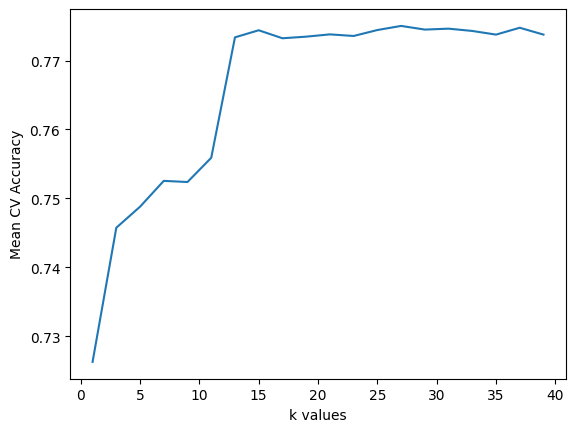

In [ ]:
plt.figure()
plt.plot(scores["param_n_neighbors"], scores["mean_test_score"], label="Mean CV accuracy")
plt.xlabel("k values")
plt.ylabel("Mean CV Accuracy")
plt.plot()

In [ ]:
problem  = us_dataset_df.drop(columns=["income"])
solution = us_dataset_df["income"]

x_train, x_test, y_train, y_test = train_test_split(problem, solution, test_size=0.2, random_state=7)

knn_model = neighbors.KNeighborsClassifier(27)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_test_prediction = knn_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_test_prediction))

0.8430300016575502


In [ ]:
print(confusion_matrix(y_test, y_test_prediction))

[[4244  294]
 [ 653  842]]


# Decision Tree

In [ ]:
def get_optimal_parameter_decision_tree(data, solution_column):
    problem = data.drop(solution_column, axis=1)
    solution = data[solution_column]

    n_folds = 10
    parameters = {"max_depth" : [max_depth for max_depth  in range(5, 16, 5)],
                 "min_samples_leaf" : [min_samples for min_samples  in range(50, 151, 10)],
                 "criterion": ["gini", "entropy"]}

    grid_search_object = GridSearchCV(DecisionTreeClassifier(),
                                      parameters,
                                      cv=n_folds,
                                      scoring="accuracy",
                                      verbose=True
    )
    grid_search_object.fit(problem, solution)

    print(grid_search_object.best_params_)
    scores = pandas.DataFrame(grid_search_object.cv_results_)
    return scores


In [ ]:
get_optimal_parameter_decision_tree(data=us_dataset_df, solution_column="income")

Fitting 10 folds for each of 66 candidates, totalling 660 fits
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 120}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026644,0.003271,0.001977,0.000571,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.577063,0.873053,...,0.807029,0.814324,0.808024,0.823607,0.816976,0.819629,0.804377,0.796272,0.075375,53
1,0.024173,0.001090,0.001514,0.000548,gini,5,60,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.577063,0.872721,...,0.807029,0.814324,0.808024,0.823607,0.816976,0.819629,0.804377,0.796238,0.075342,54
2,0.024308,0.001637,0.001661,0.000553,gini,5,70,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.577063,0.873053,...,0.807029,0.814324,0.809350,0.823607,0.816976,0.819629,0.804377,0.796404,0.075397,52
3,0.024548,0.000738,0.001693,0.000677,gini,5,80,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.577063,0.873053,...,0.807029,0.814324,0.809350,0.823607,0.817971,0.819629,0.805371,0.796669,0.075455,48
4,0.024706,0.001338,0.001959,0.000565,gini,5,90,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.577063,0.873053,...,0.807029,0.814324,0.809350,0.823607,0.817971,0.819629,0.805371,0.796669,0.075455,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.039382,0.001620,0.001819,0.000583,entropy,15,110,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.589659,0.866755,...,0.819960,0.813329,0.820292,0.837202,0.823607,0.831233,0.819297,0.805887,0.073511,5
62,0.040884,0.003544,0.001702,0.000639,entropy,15,120,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.588664,0.864435,...,0.815318,0.813329,0.820292,0.838528,0.822944,0.832560,0.814655,0.808771,0.076212,1
63,0.038517,0.001310,0.001491,0.000532,entropy,15,130,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.589327,0.866092,...,0.814987,0.809682,0.817308,0.831897,0.819629,0.828249,0.816976,0.806981,0.075562,4
64,0.038984,0.002518,0.001455,0.000471,entropy,15,140,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.589659,0.867087,...,0.815981,0.817308,0.824271,0.832228,0.819629,0.828912,0.814655,0.804428,0.073048,7


In [ ]:
problem  = us_dataset_df.drop(columns=["income"])
solution = us_dataset_df["income"]

x_train, x_test, y_train, y_test = train_test_split(problem, solution, test_size=0.2, random_state=7)

decision_tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=15, min_samples_leaf=120)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=120)

In [ ]:
y_test_prediction = decision_tree_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_test_prediction)

array([[4276,  262],
       [ 625,  870]], dtype=int64)

In [ ]:
accuracy_score(y_test, y_test_prediction)

0.8529753025029008

In [ ]:
dot_data = StringIO()#pour que l'output ne soit pas sur un fichier mais sur le notebook directement
export_graphviz(decision_tree_model, out_file=dot_data, feature_names=x_train.columns, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("dt.png")


True

NameError: name 'us_dataset_df' is not defined